Myeloma Classification


In [ ]:
!unzip -u "/content/drive/MyDrive/New folder.zip" -d "/content/drive/MyDrive/Myeloma_data" 

Archive:  /content/drive/MyDrive/New folder.zip
   creating: /content/drive/MyDrive/Myeloma_data/test/
   creating: /content/drive/MyDrive/Myeloma_data/test/myeloma/
  inflating: /content/drive/MyDrive/Myeloma_data/test/myeloma/1161.png  
  inflating: /content/drive/MyDrive/Myeloma_data/test/myeloma/1162.png  
  inflating: /content/drive/MyDrive/Myeloma_data/test/myeloma/1163.png  
  inflating: /content/drive/MyDrive/Myeloma_data/test/myeloma/1164.png  
  inflating: /content/drive/MyDrive/Myeloma_data/test/myeloma/1165.png  
  inflating: /content/drive/MyDrive/Myeloma_data/test/myeloma/1166.png  
  inflating: /content/drive/MyDrive/Myeloma_data/test/myeloma/1167.png  
  inflating: /content/drive/MyDrive/Myeloma_data/test/myeloma/1168.png  
  inflating: /content/drive/MyDrive/Myeloma_data/test/myeloma/1169.png  
  inflating: /content/drive/MyDrive/Myeloma_data/test/myeloma/1170.png  
  inflating: /content/drive/MyDrive/Myeloma_data/test/myeloma/1171.png  
  inflating: /content/drive/MyD

In [ ]:
import sys
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import merge, Input


In [ ]:
# define cnn model
def define_model():
	# load model
  image_input = Input(shape=(224, 224, 3))
  model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet') 
	# mark loaded layers as not trainable
  for layer in model.layers:
    layer.trainable = False

	# add new classifier layers
  flat1 = Flatten()(model.layers[-1].output)
  class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
  output = Dense(1, activation='sigmoid')(class1)
	# define new model
  model = Model(inputs=model.inputs, outputs=output)
	# compile model
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model


In [ ]:
# run the test harness for evaluating a model

# define model
model = define_model()
# create data generator
datagen = ImageDataGenerator(featurewise_center=True,width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# specify imagenet mean values for centering
datagen.mean = [123.68, 116.779, 103.939]
# prepare iterator
train_it = datagen.flow_from_directory('/content/drive/MyDrive/Myeloma_data/train/',
    class_mode='binary', batch_size=32, target_size=(224, 224))
test_it = datagen.flow_from_directory('/content/drive/MyDrive/Myeloma_data/test/',
    class_mode='binary', batch_size=32, target_size=(224, 224))



#class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)



# fit model
history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
    validation_data=test_it, validation_steps=len(test_it), epochs=5, verbose=1)
# evaluate model
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))
# learning curves


Found 2101 images belonging to 2 classes.
Found 528 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
66/66 [==============================] - 960s 15s/step - loss: 0.6587 - accuracy: 0.7375 - val_loss: 0.5231 - val_accuracy: 0.8712
Epoch 2/5
66/66 [==============================] - 46s 693ms/step - loss: 0.4743 - accuracy: 0.8811 - val_loss: 0.3574 - val_accuracy: 0.8769
Epoch 3/5
66/66 [==============================] - 45s 688ms/step - loss: 0.3259 - accuracy: 0.9002 - val_loss: 0.2774 - val_accuracy: 0.8939
Epoch 4/5
66/66 [==============================] - 45s 683ms/step - loss: 0.2568 - accuracy: 0.9033 - val_loss: 0.2530 - val_accuracy: 0.8807
Epoch 5/5
66/66 [==============================] - 46s 689ms/step - loss: 0.2295 - accuracy: 0.9148 - val_loss: 0.2387 - val_accuracy: 0.9072


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


> 88.636


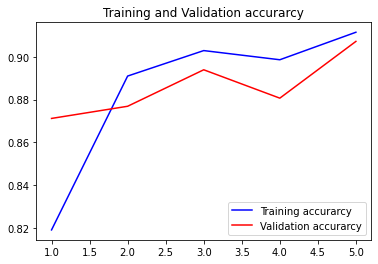

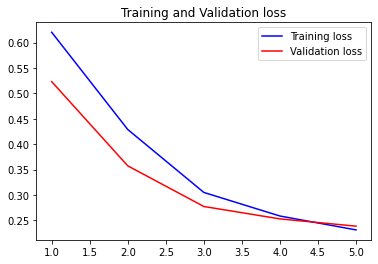

In [ ]:
#lets plot the train and val curve
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()



plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

Training in NewWay

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

In [ ]:
INIT_LR = 1e-3
EPOCHS = 5
BS = 32

In [ ]:
print("[INFO] loading images...")
imagePaths = list(paths.list_images("/content/drive/MyDrive/Myeloma_data/dataset"))
data = []
labels = []

# loop over the image paths
for imagePath in imagePaths:
	# extract the class label from the filename
	label = imagePath.split(os.path.sep)[-2]

	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(label)

[INFO] loading images...


In [ ]:
# convert the data and labels to NumPy arrays while scaling the pixel
# intensities to the range [0, 255]
data = np.array(data) / 255.0
labels = np.array(labels)

# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [ ]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

# initialize the training data augmentation object
trainAug = ImageDataGenerator(
    rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

# load the VGG16 network, ensuring the head FC layer sets are left
# off
baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

In [ ]:
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])


[INFO] compiling model...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] training head...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
65/65 [==============================] - 100s 963ms/step - loss: 0.6263 - accuracy: 0.6461 - val_loss: 0.5347 - val_accuracy: 0.7852
Epoch 2/5
65/65 [==============================] - 33s 508ms/step - loss: 0.5155 - accuracy: 0.7576 - val_loss: 0.4501 - val_accuracy: 0.8061
Epoch 3/5
65/65 [==============================] - 33s 511ms/step - loss: 0.4591 - accuracy: 0.8011 - val_loss: 0.3957 - val_accuracy: 0.8517
Epoch 4/5
65/65 [==============================] - 33s 512ms/step - loss: 0.4024 - accuracy: 0.8426 - val_loss: 0.3464 - val_accuracy: 0.8707
Epoch 5/5
65/65 [==============================] - 33s 510ms/step - loss: 0.3593 - accuracy: 0.8605 - val_loss: 0.3189 - val_accuracy: 0.8745


In [ ]:
model.save("/content/drive/MyDrive/Myeloma_data/aug_model.h5")

In [ ]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/Myeloma_data/aug_model.h5')

In [ ]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

[INFO] evaluating network...


In [ ]:
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

              precision    recall  f1-score   support

     myeloma       0.89      0.90      0.89       291
 non_myeloma       0.87      0.86      0.86       235

    accuracy                           0.88       526
   macro avg       0.88      0.88      0.88       526
weighted avg       0.88      0.88      0.88       526

acc: 0.8802
sensitivity: 0.9003
specificity: 0.8553


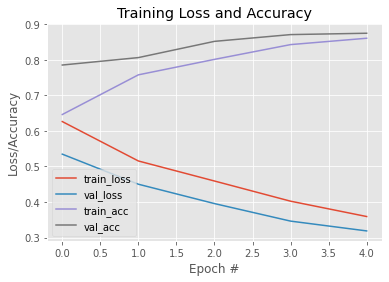

In [ ]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

Confusion matrix, without normalization
[[262  29]
 [ 34 201]]


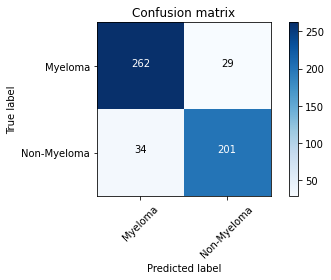

In [ ]:
#Evaluation of Model - Confusion Matrix Plot
import itertools 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(testY.argmax(axis=1), predIdxs)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Myeloma','Non-Myeloma'],
                      title='Confusion matrix')

In [ ]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(testY.argmax(axis=1), predIdxs).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  262
False Positives:  29
False Negatives:  34
True Positives:  201
